# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/maria-n-ramos/cientistadedadosEBAC/main/%C3%81rvores%20I/demo01_dummy.csv")
data.head(3)

,Unnamed: 0,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau,...,educacao_Secondary / secondary special,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,0,58.832877,3.106849,1,0,0,0,2.0,False,...,1,1,0,0,0,1,0,0,0,0
1,1,0,52.356164,8.358904,1,0,1,1,1.0,False,...,1,0,0,1,0,1,0,0,0,0
2,2,0,52.356164,8.358904,1,0,1,1,1.0,False,...,1,0,0,1,0,1,0,0,0,0


In [4]:
data = data.drop(['Unnamed: 0'], axis=1)

In [9]:
y = data.mau
X = data.drop('mau', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [10]:
clf = DecisionTreeClassifier(random_state = 100)

In [11]:
clf = clf.fit(X_train, y_train)

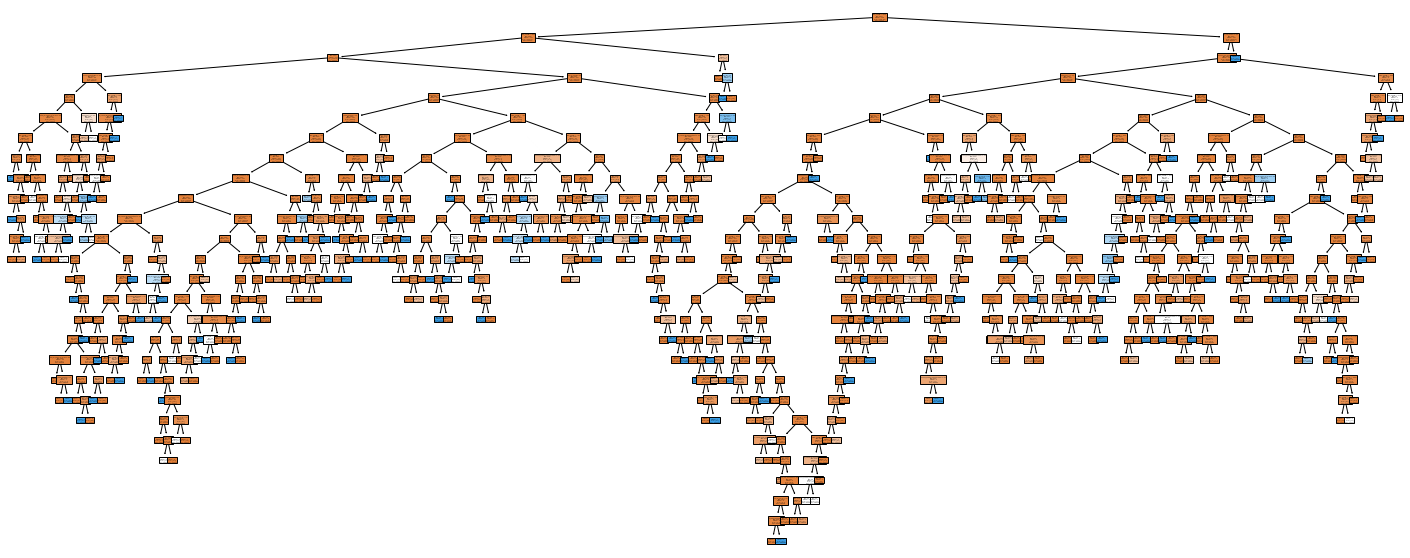

In [12]:
plt.figure(figsize = (25, 10))

plot_tree(clf,
          filled = True,
          class_names = ['Aprovado','Reprovado'],
          feature_names=X_train.columns);

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


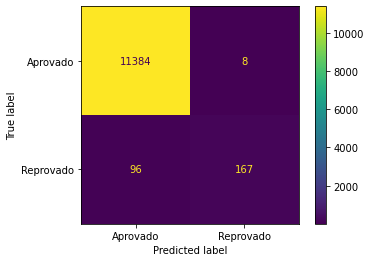

In [13]:
plot_confusion_matrix(clf, X_train,y_train, display_labels = ['Aprovado', 'Reprovado'])

In [16]:
predict = clf.predict(X_train)
accuracy_score(y_train, predict)

0.991076791076791

In [15]:
(11384+167)/(11384+8+96+167)

0.991076791076791

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [17]:
y_chapeu_test_predict = clf.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


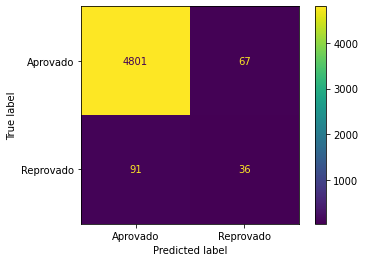

In [18]:
plot_confusion_matrix(clf, X_test, y_test, display_labels = ['Aprovado', 'Reprovado'])

In [20]:
accuracy_score(y_test, y_chapeu_test_predict)

0.9683683683683684

In [26]:
if accuracy_score(y_train, predict) > accuracy_score(y_test, y_chapeu_test_predict):
  q = accuracy_score(y_train, predict) - accuracy_score(y_test, y_chapeu_test_predict)
  print("acurácia de treinamento é", q*100,"% maior")
  q = accuracy_score(y_train, predict) - accuracy_score(y_test, y_chapeu_test_predict)
else:
  print("acurácia de da base de teste é", -1*q*100,"% maior")

acurácia de treinamento é 2.270842270842266 % maior


In [27]:
clf_podada = DecisionTreeClassifier(min_samples_leaf = 5,
                                    max_depth = 10,
                                    random_state = 123)

clf_podada = clf_podada.fit(X_train, y_train)

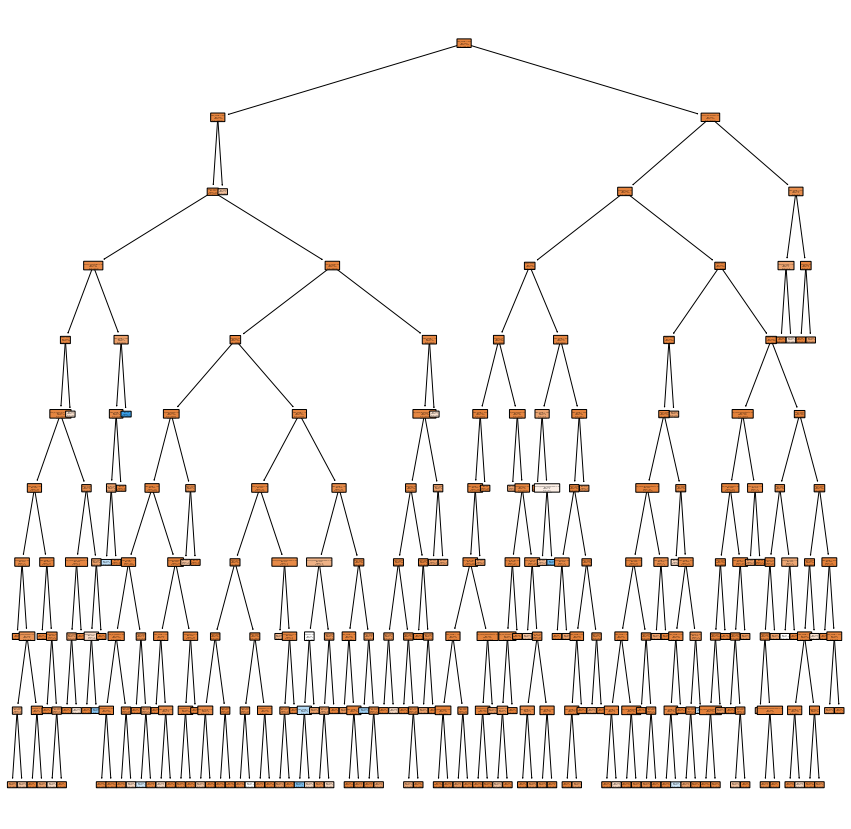

In [28]:
plt.figure(figsize = [15, 15])

plot_tree(clf_podada,
          filled = True,
          rounded = True,
          class_names = ['Aprovado', 'Reprovado'],
          feature_names = X_train.columns);

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


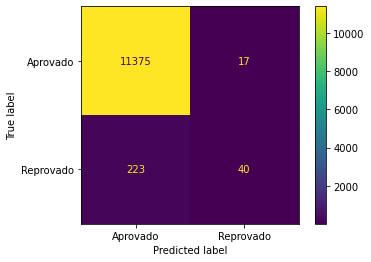

In [29]:
plot_confusion_matrix(clf_podada, X_train, y_train, display_labels = ['Aprovado', 'Reprovado'])

In [32]:
X_train.shape

(11655, 28)

In [34]:
(11655-28)/(11655+28)

0.9952067106051528